
# Simple Linear Regression Model

Regression is the statistical approach to find the relationship between variables. While solving Linear Regression problem, we assume the relation between two variables is linear.

Lets build a simple regression model to see how much marks a student will score based on the number of hours they study.

### Step 1)Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url= "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2) Analysing the data

In [ ]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.shape

(25, 2)

### Lets plot the data using seaborn scatterplot()

Text(0.5, 1.0, 'Distribution curve of Hours studied vs Marks obtained')

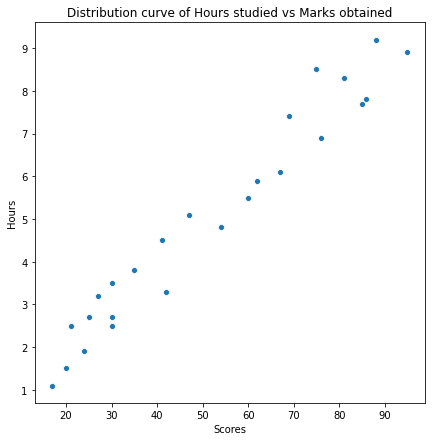

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Scores",y="Hours",data=df)
plt.title("Distribution curve of Hours studied vs Marks obtained")

## 3)Splitting data into Training and Test set

In [ ]:
#Divide the data into attributes X and label Y
x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=0)

## 4)Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)
print("Training Completed Successfully")

Training Completed Successfully


Lets see the accuracy obtained on test dataset

In [ ]:
print("Training Accuracy :",model.score(x_train,y_train))
print("Test accuracy :",model.score(x_test,y_test))

Training Accuracy : 0.9515510725211553
Test accuracy : 0.9454906892105354


Text(0.5, 1.0, 'Regression Line')

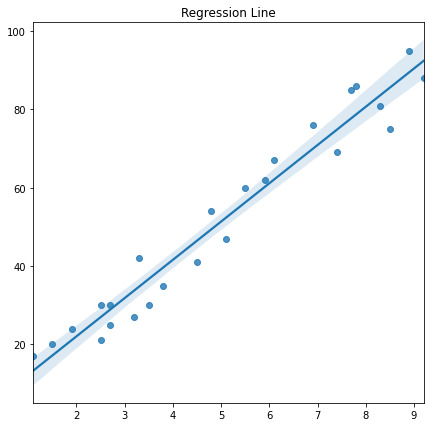

In [ ]:
#Plotting the regression line

plt.figure(figsize=(7,7))
sns.regplot(x=x,y=y)
plt.title("Regression Line")



## 5)Prediction on test set

In [ ]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


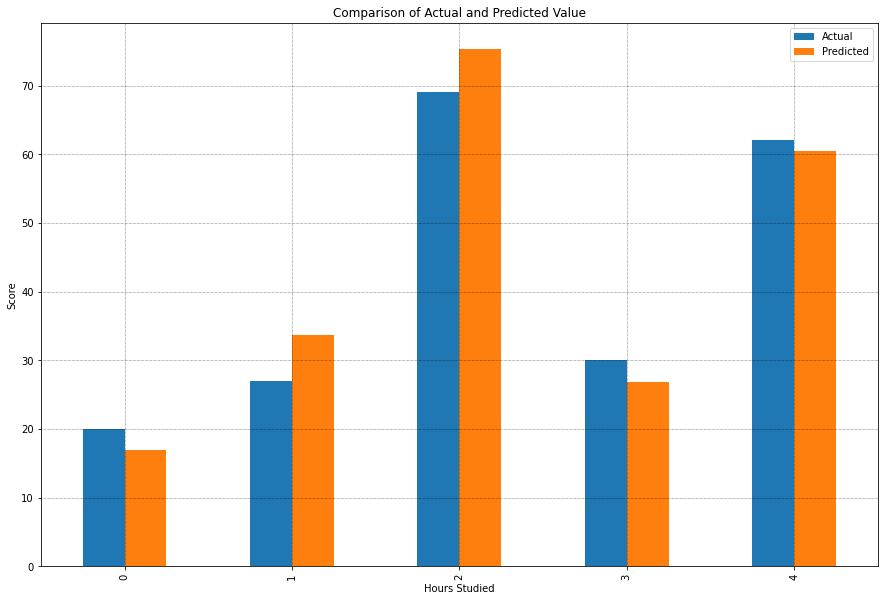

In [ ]:
df1.plot(kind='bar',figsize=(15,10))
plt.title('Comparison of Actual and Predicted Value')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


## Predict the score of a student with a random study hours

In [ ]:
predict_score=model.predict([[7.4]])
print("Student is likely to score {} marks".format(int(predict_score)))

Student is likely to score 75 marks
